# **Stenografia**

## **Podstawy kryptografii**

*Ivan Kaliadzich*

### Biblitoteki

In [32]:
from PIL import Image
import numpy as np
import string
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, IntSlider
from IPython.display import display

### Odczytanie zdjęcia


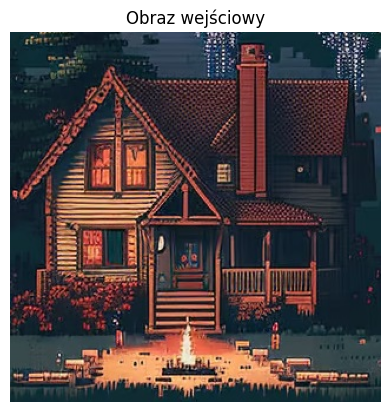

Liczba pikseli: 98910


In [12]:
image_path = 'image_for_encryption.jpg'
img = Image.open(image_path)
num_pixels = img.width * img.height

plt.imshow(img)
plt.axis('off')
plt.title("Obraz wejściowy")
plt.show()
print(f"Liczba pikseli: {num_pixels}")

### Generowanie wiadomości


In [25]:
def generate_random_text(length):
    char = string.ascii_letters + string.digits + ' '
    random_text = ''.join(random.choice(char) for _ in range(length))
    return random_text

num_chars = num_pixels //3 
random_text = generate_random_text(num_chars)
print(f"Losowa wiadomość (długość = {len(random_text)}):",'\n', random_text)

Losowa wiadomość (długość = 32970): 
 Msmh HJ1w8DKrI6WgH3lxg87ORgCxIWkSZjbKUO5Dshkd49cTLd0zbu63ip6DJEOiGcqzu2H0LIqGbdEQvAjhgQpQyNsRTlTjJzVI3s6fZM898L  LTGwMNBQ97xOLSjQD8zmMNutEFKsVJ2bFbIDlTPEMTMcYI7g0iE91nm2gWFw9MQQyRyBSPrHOBQKzj vV1p5QiyBaIW1WjRSmQskub46UNwmVG7qDy3oKUiEOHA6yAWuY4uSdu5GWCfKAAL9MxEQUpb1EICoOJdg67a9WPDjg3crjvzeOM2x 41jBdilwhbZSFnb5smA3ZHxs5CrSONSMCz LCnExV30hNKRNc8xxy9ZQyisbs17G9hcUcCoMB1ytkZXf6Wi8HNFypQwIqh2B7WZnh2hZTp8GoQLsQcfQg4uhBdchDl5zsIUC 7k6bRNppPdw8VEyDcpC9SHFQNpI5yp0RXw5SXVycIiFNSorKoHSwAkiph15W 7fbxh2orMv3fXtd eEQv0LbiqUTI2EQRxhhf26zb mTMneBZFHyApmGKXcBF8naCQ0lP pAYqDIHbXYNLa03L5pkfNlGgM1vfsqRsAkd4kkT WFYo75sWT2yTEyp9Otl9s Ji7OqkkUMCfazfp92nb6XtGGdAggm8iUcs2biRg09xA0FNtfqtJBX6DE3Bpjd jWMoAJYFqkG41nk3bsjXrCU5YTyJC11S7BEYd0gtSsSGZEO8IqDLgm2EhJJ2AIepi8KgqnGF7iaZrtGqpQvWDFdpwAf0O5COmaLKjBk5bvAaErgp9scCzNNG x9tV3qNdOZ0VCBSFhdXj1Vk3sPECXu00hGXkXIMVz1CnCViNQv5b6WcLh Fr8 CXBIvOPKJiz1Fl465wt9Ntj2xWcWfEb8THukVKRZ25f EIDFHh6bmvx3quYzAwQhVdYOq7kyJsn64WRor4ENg9QHKsEWo5fF n

### Konwertacja tekstu na ciąg bitów

In [26]:
def text_to_bin(text):
    return ''.join(format(ord(c), '08b') for c in text)

### Szyfrowanie

In [27]:
def encryption(image_path, text):
    image = Image.open(image_path).convert('RGB')
    arr = np.array(image)
    binary_text = text_to_bin(text) + '00000000'
    data_iter = iter(binary_text)
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            pixel = list(arr[i,j])
            
            for k in range(3): # dla R, G, B
                try:
                    bit = next(data_iter)
                except StopIteration:
                    img_modified = Image.fromarray(arr)
                    return img_modified
            
                if bit == '0':
                    pixel[k] &= 0b11111110
                else:
                    pixel[k] |= 0b00000001
            
            arr[i, j] = tuple(pixel)
        
    img_modified = Image.fromarray(arr)
    return img_modified

### Wynik szyfrowania


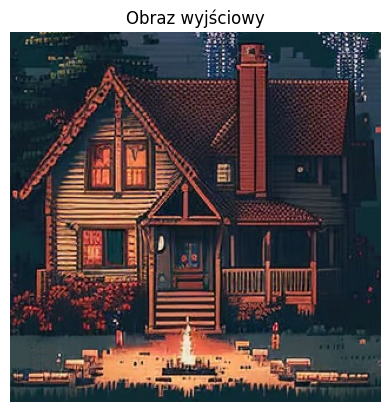

In [28]:
encrypted_picture = encryption(image_path, random_text)
plt.imshow(encrypted_picture)
plt.axis('off')
plt.title("Obraz wyjściowy")
plt.show()

Nie bardzo widać różnicy między obrazem wejściowym i wyjściowym, dlatego zrobimy deszyfrowanie, żeby sprawdzić poprawnośc.

### Sprawdzenie wyników


In [31]:
def verification(image_path, length):
    img = Image.open(image_path).convert('RGB')
    arr = np.array(img)

    binary_text = ''

    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            pixel = arr[i, j]
            for k in range(3):  
                binary_text += str(pixel[k] & 1)  

    all_bytes = [binary_text[i:i + 8] for i in range(0, len(binary_text), 8)]
    decoded_text = ''
    
    for byte in all_bytes:
        if len(decoded_text) < length:
            decoded_text += chr(int(byte, 2))
        else:
            break
            
    return decoded_text


modified_image_path = 'modified_image.png'
encrypted_picture.save(modified_image_path)
decrypted_text = verification(modified_image_path, len(random_text))
is_same = decrypted_text == random_text

print(f"Czy deszyfrowany tekst jest taki sam jak tekst oryginalny? {is_same}")

Czy deszyfrowany tekst jest taki sam jak tekst oryginalny? True


### Suwak
Żeby polepszyć widoczność, dodaję suwak, aby zmieniać nie ostatni bit, a moglibyśmy wybierać jaki zmieniać.

In [36]:
# przepana funkcja 'encryption', ale z dodatkową zmienną

def encryption_slider(image_path, text, bit_position):
    image = Image.open(image_path).convert('RGB')
    arr = np.array(image)
    binary_text = text_to_bin(text) + '00000000'
    data_iter = iter(binary_text)
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            pixel = list(arr[i,j])
            
            for k in range(3):
                try:
                    bit = next(data_iter)
                except StopIteration:
                    img_modified = Image.fromarray(arr)
                    return img_modified
                    
                mask = 1 << bit_position
                if bit == '0':
                    pixel[k] &= ~mask
                else:
                    pixel[k] |= mask
            arr[i, j] = tuple(pixel)
        
    img_modified = Image.fromarray(arr)
    return img_modified


def change_picture(bit_position):
    modified_img = encryption_slider(image_path, random_text, bit_position)
    display(modified_img)


def slider():
    interact(change_picture, bit_position=IntSlider(min=0, max=7, step=1, value=7))


slider()

interactive(children=(IntSlider(value=7, description='bit_position', max=7), Output()), _dom_classes=('widget-…